In [17]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def DBSCAN(matrix, eps, minpts, neighboursnp, num_neighboursnp):
    
    Noise = []
    c = 0;
    label = {}
    visited = np.full((matrix.shape[0], ), False)
    for i in range(matrix.shape[0]):
        
        if (not visited[i]):
           
            visited[i] = True
            neighbours = neighboursnp[i]
            
            if(num_neighboursnp[i] < minpts):
                label[i] = "Noise"
                continue
            c += 1
            label[i] = c;
            q = np.where(neighbours == i)
            if(q[0].shape[0] > 0):
                neighbours = np.delete(neighbours, q[0][0])

            count = 0
            while(count < len(neighbours)):
                point = neighbours[count]
                if(not visited[point]):
                    visited[point] = True
                    neighbourstemp = neighboursnp[point]
                    q = np.where(neighbourstemp == point)
                    if(q[0].shape[0] > 0):
                        neighbourstemp = np.delete(neighbourstemp, q[0][0])
                    if(num_neighboursnp[point] >= minpts):
                        neighbours = np.concatenate((neighbours,np.array(np.delete(neighbourstemp, np.searchsorted(neighbourstemp, np.intersect1d(neighbours,neighbourstemp))))))
                    label[point] = c
                count +=1
    print(c)
    clusterwise = {}
    for lab in label.keys():
        if(label[lab] != 'Noise'):
            if label[lab] in clusterwise:
                clusterwise[label[lab]].append(lab)
            else:
                list1 = [lab]
                clusterwise[label[lab]] = list1[:]
        else:
            Noise.append(label[lab])
    print(len(Noise))
    return clusterwise

In [22]:
text_file = open('/Users/panktibhalani/Downloads/dbscan.csv', 'r')
lines = text_file.readlines();
matrix = []
cluster = []
points = []
num_neighbours = []
neighbors = []
count = 0
for line in lines:
    line = line.replace('"','')
    line = line.replace('\n','')
    if(count > 0):
        locallist = []
        loc = line.split(",")
        points.append(loc[1])
        locallist.append(loc[2])
        locallist.append(loc[3])
        matrix.append(locallist)
        num_neighbours.append(loc[4])
        listtemp = loc[5:len(loc)]
        loclist = list(map(int,listtemp))
        neighbors.append(loclist)
    count += 1
    
matrixnp = np.array(matrix)
num_neighbours = list(map(int,num_neighbours))
neighborsnp = np.array(neighbors)
num_neighboursnp = np.array(num_neighbours)
pointnp = np.array(points)
print(matrixnp.shape)
print(neighborsnp.shape)
print(num_neighboursnp.shape)
print(pointnp.shape)
label = DBSCAN(matrixnp, 7.5, 3,neighborsnp,num_neighboursnp)
print(len(label))

(80, 2)
(80,)
(80,)
(80,)
3
26
3


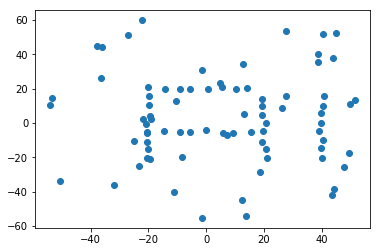

In [29]:
# print(matrixnp[:,1])

plt.scatter(matrixnp[:,0].astype('float'),matrixnp[:,1].astype('float'))
plt.show()

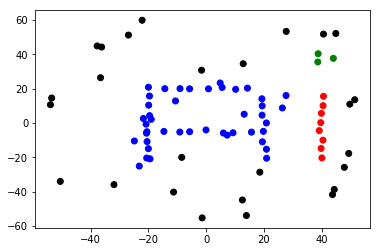

In [30]:
clrArr = np.full(len(matrixnp),"Black")
for l in label[1]:
    clrArr[l] = 'Red'
for l in label[2]:
    clrArr[l] = 'Blue'
for l in label[3]:
    clrArr[l] = 'Green'

plt.scatter(matrixnp[:,0].astype('float'),matrixnp[:,1].astype('float'), c=clrArr) 
plt.show()

In [ ]:
clrArr = np.full(len(matrixnp),"Black")
for l in label[1]:
    clrArr[l] = 'Red'
for l in label[2]:
    clrArr[l] = 'Blue'
for l in label[3]:
    clrArr[l] = 'Green'

plt.scatter(matrixnp[:,0],matrixnp[:,1], c=clrArr) 
plt.show()